# Sparse models

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys

In [2]:
x = np.arange(-5, 5, 0.001)
y = np.random.normal(size=len(x))
y = np.convolve(y, np.ones(1000), mode='same')

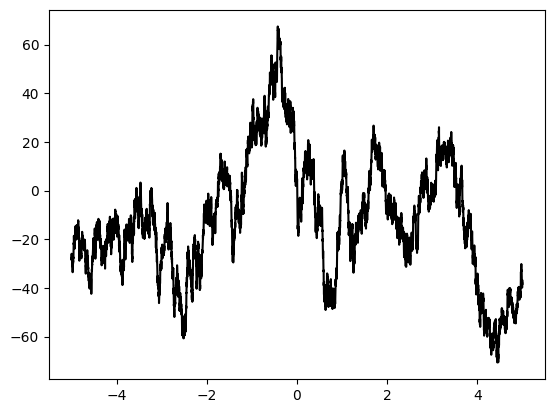

In [3]:
plt.plot(x, y, c='k')

In [4]:
from lamatrix import Spline

In [5]:
knot_spacing = 0.05
order = 3
knots = np.arange(-5 - knot_spacing * (order - 1), 5 + (knot_spacing * (order - 1)) + knot_spacing, knot_spacing)

In [6]:
model = Spline('x', knots=knots, order=order)

In [7]:
model.fit(x=x, data=y)

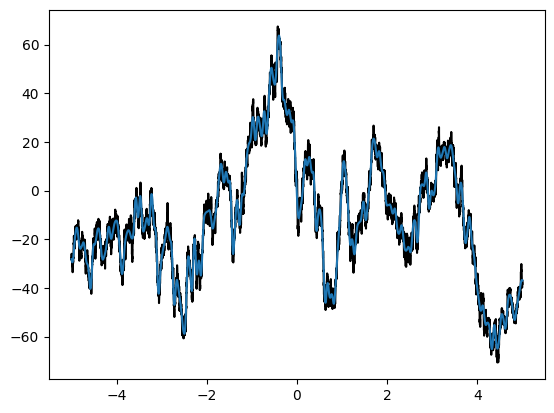

In [8]:
plt.plot(x, y, c='k')
plt.plot(x, model.evaluate(x=x))

In [9]:
model.design_matrix(x=x).nbytes

16160000

In [10]:
from lamatrix import SparseSpline

In [11]:
model_sparse = SparseSpline('x', knots=knots, order=order)

In [12]:
model_sparse.fit(x=x, data=y)

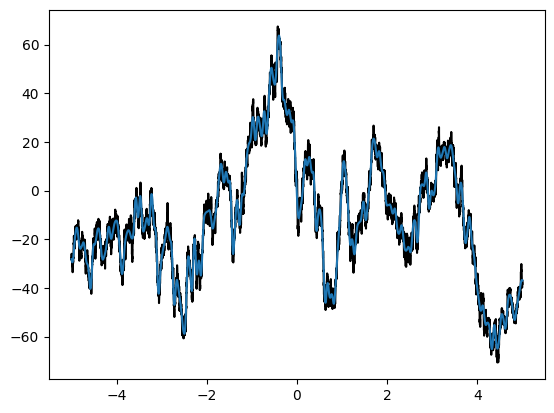

In [13]:
plt.plot(x, y, c='k')
plt.plot(x, model.evaluate(x=x))

In [14]:
model_sparse.design_matrix(x=x).data.nbytes

239992